# Notebook for Filters and Thresholding

First we import the required libraries

In [1]:
# import PIL
from PIL import Image
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy
#import tifffile
import os

import skimage

from skimage import data
from skimage.io import imsave

from skimage.filters import threshold_otsu

Next, we Initialize our array and we load our images into it

In [2]:
raw_ct_scan_array = []

for fname in os.listdir('img/'):

        im = Image.open(os.path.join('img/',fname))
        imarray = numpy.array(im)
        raw_ct_scan_array.append(imarray)

raw_ct_scan_array = numpy.asarray(raw_ct_scan_array, dtype='uint8')

We can check our array using the shape attribute

In case color's don't work
(Source: https://stackoverflow.com/questions/38709618/rgb-values-being-returned-by-pil-dont-match-rgb-color,

for reference: https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/)

In [3]:
raw_ct_scan_array.shape

(344, 1024, 1024)

We'll create a testfig placeholder variable that will contain the slice we want to test with.

In [4]:
testfig = raw_ct_scan_array[250]

Here's a sample of our images that we are using for testing filters

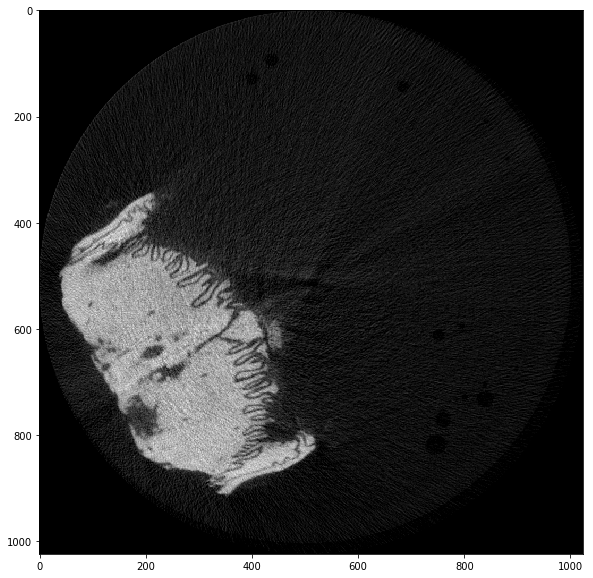

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(testfig,cmap="gray")

In [11]:
numpy.max(testfig)

201

First, we try with the Bilateral Filter. It has a sigma spatial parameter that we need to tune.

Wall time: 1.29 s


0.7119864926108282

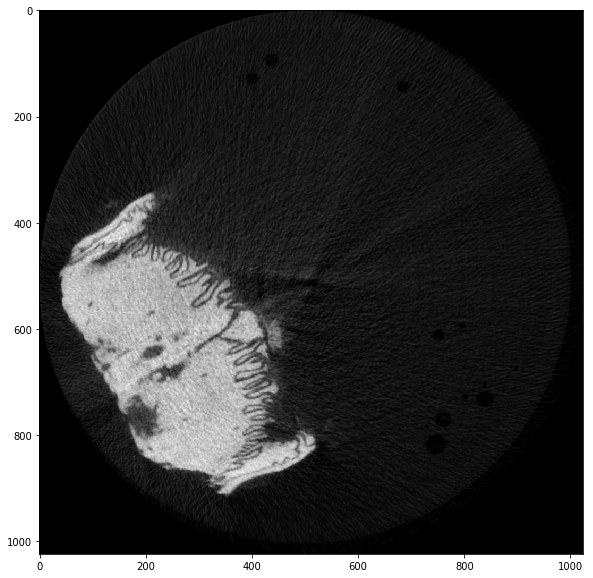

In [35]:
plt.figure(figsize=(10,10))
%time bilateral=skimage.restoration.denoise_bilateral(testfig,multichannel=False, win_size=9)
plt.imshow(bilateral,cmap='gray')
numpy.max(bilateral)

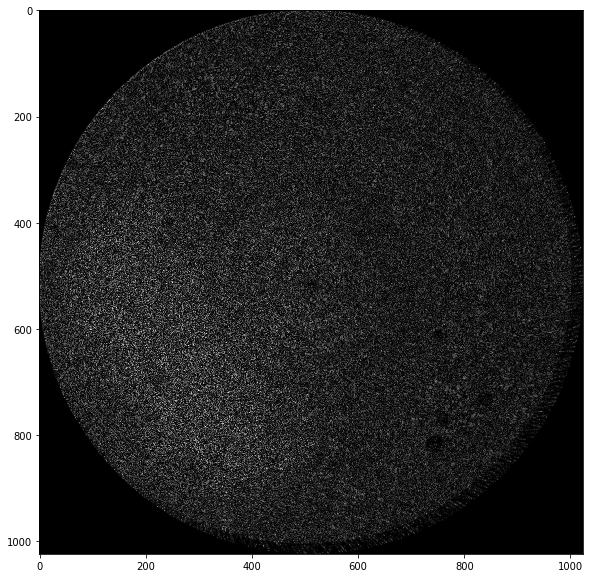

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(abs(testfig-255*bilateral),cmap='gray')

Applying Otsu threshold on the above slice, we get the following output:

In [37]:
threshold_otsu(bilateral)

0.262823138873919

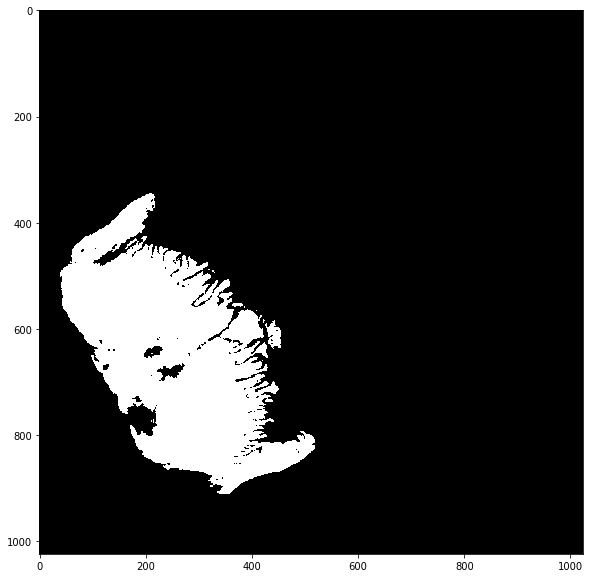

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(bilateral > threshold_otsu(bilateral),cmap='gray')

Now, we try the Non-Local Means filter. It can work on 2D and 3D shaped nparrays. It works using a patch size parameter which we don't specify here. 

When we pass the 3D shape to the method, it freezes the PC and throws a memoryerror. Upon sending a 2D image, it does work.

In [14]:
nonlocalmeans_array = skimage.restoration.denoise_nl_means(fast_mode=True,image=testfig,multichannel=False)
plt.figure(figsize=(10,10))
#plt.imshow(nonlocalmeans_array, cmap = 'gray')

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [17]:
threshold_otsu(nonlocalmeans_array)

69.99609375

Applying Otsu threshold on the above slice, we get the following output:

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(nonlocalmeans_array > threshold_otsu(nonlocalmeans_array),cmap='gray')

Observation: Bilateral gives smoother and less noisy images when threshold is applied. We'll create two seperate sets of thresholded outputs. 


---> Bilateral Filter and Threshold

---> Non Local Means and Threshold

Observation: Bilateral Filtered images have very low otsu threshold value. Non-Local Means has threshold values closer to the ones obtained without filters.

In [4]:
for img_index in range(0,344):
    bilateral_temp = skimage.restoration.denoise_bilateral(raw_ct_scan_array[img_index,:,:],multichannel=False,sigma_spatial=2)
    otsu_filtered_bilateral_temp= bilateral_temp > threshold_otsu(bilateral_temp)
    im = Image.fromarray(numpy.uint8(otsu_filtered_bilateral_temp*255))

    im.save("Bilateral_Filtered_Otsu_Output/slice(%d) .png" % (img_index+1))
    print("Exported slice %d!" % (img_index +1))

Exported slice 1!
Exported slice 2!


KeyboardInterrupt: 

Importing all of our exported bilateral filtered Slices

In [26]:
bilateral_array = []

for fname in os.listdir('Bilateral_Filtered_Output/'):

        im = Image.open(os.path.join('Bilateral_Filtered_Output/',fname))
        imarray = numpy.array(im)
        bilateral_array.append(imarray)

bilateral_array = numpy.asarray(bilateral_array, dtype='uint8')

In [27]:
flattened_bilateral_array = bilateral_array.ravel()
otsu_bilateral_array = bilateral_array > threshold_otsu(flattened_bilateral_array)
for img_index in range(0,344):
    im = Image.fromarray(numpy.uint8(otsu_bilateral_array[img_index,:,:]*255))

    im.save("Bilateral_Filtered_Otsu_Output/slice(%d) .png" % (img_index+1))
    print("Exported slice %d!" % (img_index +1))

Exported slice 1!
Exported slice 2!
Exported slice 3!
Exported slice 4!
Exported slice 5!
Exported slice 6!
Exported slice 7!
Exported slice 8!
Exported slice 9!
Exported slice 10!
Exported slice 11!
Exported slice 12!
Exported slice 13!
Exported slice 14!
Exported slice 15!
Exported slice 16!
Exported slice 17!
Exported slice 18!
Exported slice 19!
Exported slice 20!
Exported slice 21!
Exported slice 22!
Exported slice 23!
Exported slice 24!
Exported slice 25!
Exported slice 26!
Exported slice 27!
Exported slice 28!
Exported slice 29!
Exported slice 30!
Exported slice 31!
Exported slice 32!
Exported slice 33!
Exported slice 34!
Exported slice 35!
Exported slice 36!
Exported slice 37!
Exported slice 38!
Exported slice 39!
Exported slice 40!
Exported slice 41!
Exported slice 42!
Exported slice 43!
Exported slice 44!
Exported slice 45!
Exported slice 46!
Exported slice 47!
Exported slice 48!
Exported slice 49!
Exported slice 50!
Exported slice 51!
Exported slice 52!
Exported slice 53!
Ex

In [28]:
threshold_otsu(flattened_bilateral_array)

68

Now we apply thresholding by first doing ravel, and then exporting otsu thresholded output

Takes roughly 20 minutes to export all slices with bilateral filter. 

# Test Section

# ----------------------------------------------------------------------------------

In [23]:
for i in range(0,344):
    print(threshold_otsu(raw_ct_scan_array[i]))

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
68
69
69
69
68
68
68
68
68
68
69
69
70
70
70
70
70
70
70
70
69
69
69
68
68
68
68
68
68
68
67
67
67
67
67
67
68
68
68
68
68
69
69
69
69
69
69
69
68
69
69
69
69
69
70
70
70
70
70
70
70
71
71
71
71
71
71
71
71
71
71
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
70
71
71
71
71
71
71
71
71
71
71
71
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
73
73
73
73
73
73
72
72
72
72
72
72
72
72
71
71
71
71
71
70
70
70
70
70
70
69
69
69
68
68
67
67
67
67
67
67
67
67
68
68
68
68
68
68
68
68
67
67
67
67
67
67
67
67
67
68
68
68
68
68
68
68
68
68
68
67
67
67
67
67
67
67
67
67
66
65
65
64
64
62
62
61
59
58
58
56
54
53
52
9
9
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [22]:
for i in range(0,344):
    print(threshold_otsu(skimage.restoration.denoise_bilateral(raw_ct_scan_array[i],multichannel=False,sigma_spatial=2)))

0.02712054141479864
0.027106163653014798
0.027229481445636486
0.02734437331759361
0.027336262231712507
0.027384250719569028
0.027070548967956378
0.026720944816386212
0.0265210279169037
0.026023143061965282
0.02595891349120017
0.025871866621687493
0.026190143624748783
0.026052566706638986
0.025888651061497826
0.026139130099684472
0.026349422603251557
0.026314750881643107
0.026271386259625714
0.027203315832571635
0.0260114011901326
0.027058833004064205
0.027400409850267787
0.027037481915133367
0.027203196972053742
0.02733601626025963
0.027312891638839435
0.02689909622970499
0.027375231391677017
0.02710490964581038
0.027294175248997507
0.026983436679976304
0.027405262839962627
0.026927935746688076
0.027537157986209558
0.026585208254662915
0.026822774701149927
0.025887384539514807
0.027606042094094573
0.026607155047312724
0.026833336070958842
0.027084993476144334
0.027824049808993216
0.027618361118663743
0.027732613851938134
0.0279145036430445
0.026122375933490753
0.028521104345424392
0.02

KeyboardInterrupt: 

In [24]:
for i in range(0,344):
    print(threshold_otsu(skimage.restoration.denoise_nl_means(fast_mode=True,image=raw_ct_scan_array[i],multichannel=False)))

6.9609375
6.970703125
6.97265625
6.970703125
6.9609375
7.068359375
7.029296875
6.97265625
7.91015625
7.86328125
6.982421875
6.884765625
7.03125
6.93359375
6.93359375
6.982421875
7.03125
7.03125
7.03125
7.759765625
7.87109375
7.21875
6.986328125
7.029296875
7.06640625
7.068359375
6.970703125
6.97265625
6.970703125
6.97265625
6.970703125
6.970703125
6.91015625
6.986328125
7.91015625
7.921875
7.083984375
6.93359375


KeyboardInterrupt: 

# ----------------------------------------------------------------------------------

###### Applying Ravel to create 1D array, and applying OTSU thresholding

Let's create a flattened 1D array from our 4 dimensional array. Method mentioned at this URL.
(https://stackoverflow.com/questions/13730468/from-nd-to-1d-arrays)

Professor mentioned array reshape function, also look into that as well.

(Source: https://stackoverflow.com/questions/36384760/transforming-a-row-vector-into-a-column-vector-in-numpy)

In [ ]:
flattened_row_array=raw_ct_scan_array.ravel()

Now, we're going to apply threshold_otsu function on our 1D Vector. (Save before executing, might crash)

In [ ]:
flattened_row_array.shape

In [ ]:
column_array=flattened_row_array.reshape(-1,1)

In [ ]:
column_array

The resulting image is in grayscale. However, imshow, by default, uses a kind of heatmap (called vidris) to display the image intensities. Just specify the grayscale colormap as shown below:
plt.imshow(mountain_r, cmap="gray")
For all the possible colormaps, have a look at the colormap reference.
(Source: https://stackoverflow.com/questions/39805697/skimage-why-does-rgb2gray-from-skimage-color-result-in-a-colored-image)

Shape of the flattened_array is (1442840576,). now it's (360710144,)

Apply thresholding

In [ ]:
%time thresh = threshold_otsu(column_array)

Wall time: 3.36 s (Recorded time to execute thresholding on the vector. Same timing on both row and column vectors.)

(On first run, PC freezed. After cold booting again, it worked the second time)

In [ ]:
print(thresh)

Threshold value is SAME for both row and column vectors.

So now we have the threshold value in above thresh variable. We apply that using a simple binary operation, >

It basically sets all values above the threshold to TRUE, and everything else as FALSE. (Interpreted as 1 and 0)

In [ ]:
thresholded_array = raw_ct_scan_array > thresh

Variable that stores the thresholded array

In [ ]:
plt.imshow(thresholded_array[153,:,:],cmap="gray")

Refer this for file saving methods using PIL and scipy

(Source: https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image)

imsave('Path_to_your_folder/File_name.jpg',your_array) << Use this with skimage.io > imsave function

https://stackoverflow.com/questions/10965417/how-to-convert-numpy-array-to-pil-image-applying-matplotlib-colormap << This worked 

###### Applying the morphological operations

Morphological operations are basically just transformations applied to a 2D image array that can be used for growing, shrinking, or finding edges in an image, etc.

We are interested in removing the tiny holes and gaps in our thresholded bone scans, and we apply Dilation to fill them in.

 In any given technique, we probe an image with a small shape or template called a structuring element, which defines the region of interest or neighborhood around a pixel.
 (Source: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html)

In [ ]:
from scipy import ndimage

In [ ]:
%time holes_filled_array= ndimage.binary_fill_holes(input=thresholded_array,structure=numpy.ones((5,5,5)))

In [ ]:
plt.imshow(holes_filled_array[153,:,:],cmap='gray')

In [ ]:
for img_index in range(0,344):
    im = Image.fromarray(numpy.uint8(holes_filled_array[img_index,:,:]*255))

    im.save("Morphological_Binary_hole_filling_5x5x5/hole_filled_5x5x5_slice(%d) .png" % (img_index+1))

If folder doesn't exist, make one with the name mentioned in the function else program will not work.

Our thresholded output is in the folder called Otsu_output.